# IMPORT LIBRARIES

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import dataset

In [194]:
df=pd.read_csv(r"C:\Users\yaksh\OneDrive\Desktop\programing\ML\kaggle data\HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [195]:
# there are few unnecessary columnsa such as time_spend_company,work accident
df.drop(["time_spend_company", "Work_accident"],axis='columns',inplace=True)

In [196]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,1.000000,1.000000


# Checking Null values

In [197]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [198]:
df['left'].value_counts()
# Here we can clearly see that 3571 employees left hte company due to various reasons

0    11428
1     3571
Name: left, dtype: int64

In [199]:
df1=df[df['left']==1]  # Dataframe which contains employees who left the company
df2=df[df['left']==0]  # Dataframe which contains employees who did not leave the company

In [200]:
correlation=df.corr()
correlation
# This table shows th correlation between the columns which is followed by a heatmap of these correlation values

C:\Users\yaksh\AppData\Local\Temp\ipykernel_20340\287941608.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df.corr()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.071287,-0.003544
left,-0.388375,0.006567,0.023787,0.071287,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,-0.061788,1.000000


<Axes: >

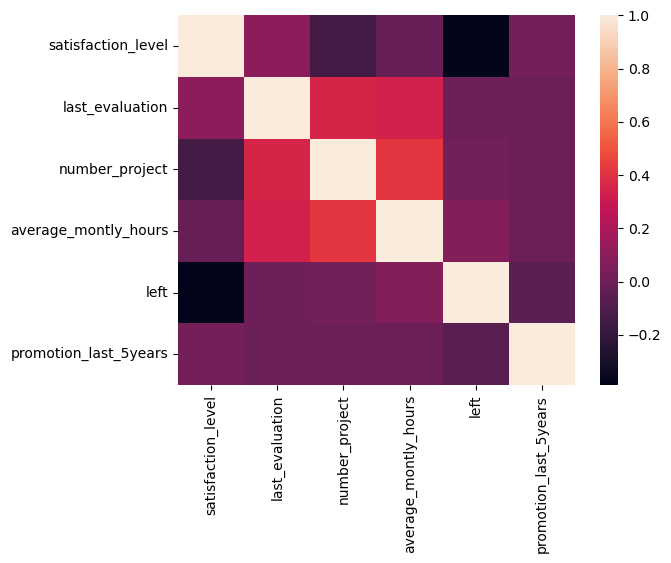

In [201]:
import seaborn as sns
sns.heatmap(correlation)
# Here we can observe that employees who have low satisfaction level did not get promotion with in last 5 years left the 
# company mostly and also whose monthly average workking hours are more

# EMPLOYEES LEFT THE COMPANY

# Data Visualization

<Axes: xlabel='satisfaction_level', ylabel='Count'>

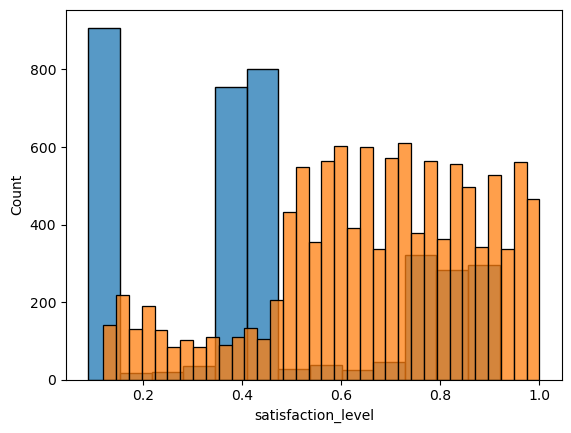

In [202]:
import seaborn as sns
sns.histplot(df1['satisfaction_level'])
plt.plot()
sns.histplot(df2['satisfaction_level'])

# Here we can find that the frequency of employees leaving the company is higher in certain ranges of satisfaction levels


<Axes: xlabel='last_evaluation', ylabel='Count'>

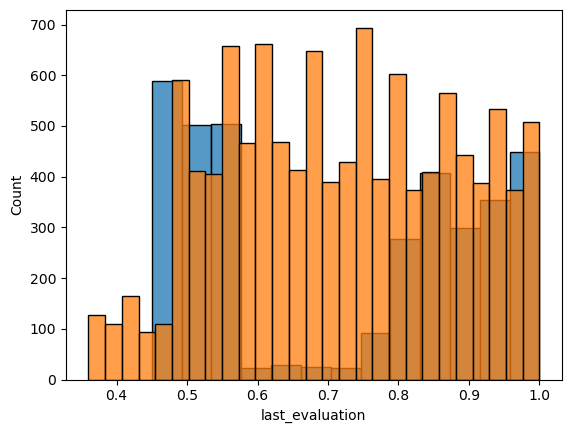

In [203]:
sns.histplot(df1['last_evaluation'])
sns.histplot(df2['last_evaluation'])

# Here we can observe that the frequency of employees leaving the company between (0.6,0.75) last evaluation value are vey less

<Axes: xlabel='average_montly_hours', ylabel='Count'>

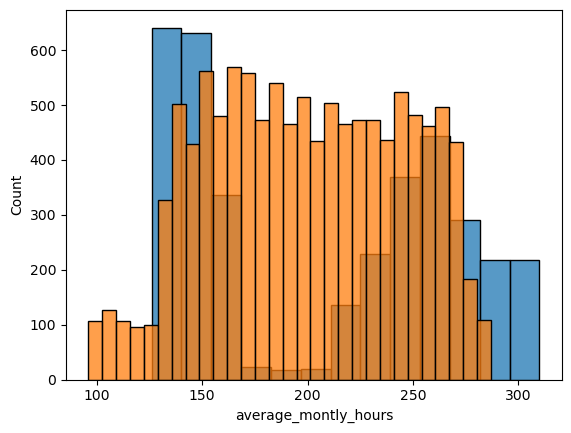

In [205]:
sns.histplot(df1['average_montly_hours'])
sns.histplot(df2['average_montly_hours'])

# Here we can observe that the people who are working less hours are leaving the company

<Axes: xlabel='number_project', ylabel='Count'>

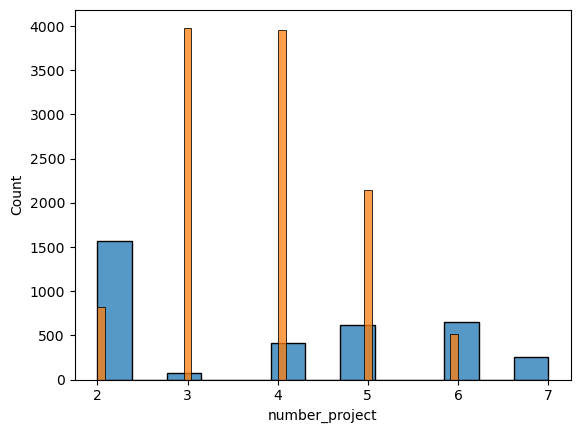

In [206]:
sns.histplot(df1['number_project'])
sns.histplot(df2['number_project'])


<Axes: xlabel='promotion_last_5years', ylabel='Count'>

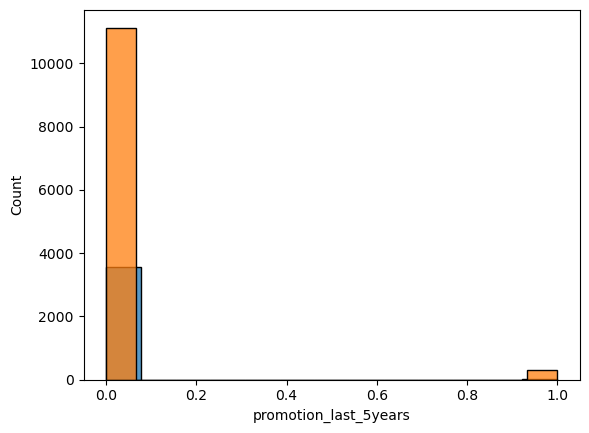

In [207]:
sns.histplot(df1['promotion_last_5years'])
sns.histplot(df2['promotion_last_5years'])

# Employees who did  not got the promotion are also leaving the company

<Axes: xlabel='salary', ylabel='Count'>

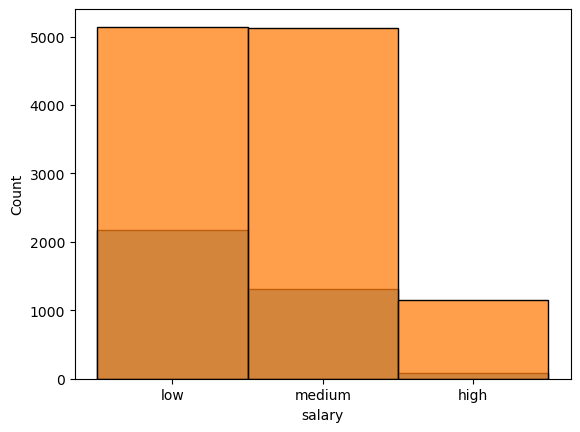

In [208]:
sns.histplot(df1['salary'])
sns.histplot(df2['salary'])

# The frequency of people who are getting less salary are also leaving the company

# Outliers Detection

In [209]:
df2=df1.copy()

In [210]:
# We can see the employees whose satisfaction level greater than 0.75 are good employees who should not leave the company 
# such that we can treat them as outliers
df3=df[(df['satisfaction_level']<=0.8)&(df['satisfaction_level']>=0.2)]
df3.shape

(9588, 8)

In [211]:
# There are employees whose last evaluation report is above average also left the company whom can be treated as good employees
# these employees are treated as outliers
df4=df3[(df3['last_evaluation']<0.8)&(df3['last_evaluation']>=0.2)]
df4.shape

(6620, 8)

In [212]:
# Depending upon the department the average monthly hours depend and with the help of sstd and mean we will remove the outliers
def employees_working_hours(df):
    employees=pd.DataFrame()
    for dep,depdf in df.groupby('Department'):
        m=np.mean(depdf['average_montly_hours'])
        sd=np.std(depdf['average_montly_hours'])
        emp=depdf[(depdf['average_montly_hours']>(m-2*sd))&(depdf['average_montly_hours']<(m+2*sd))]
        employees=pd.concat([emp,employees],ignore_index=True)
    return employees
df5=employees_working_hours(df4)
df5.shape

(6530, 8)

In [213]:
df5.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,left,promotion_last_5years,Department,salary
0,0.38,0.46,2,137,1,0,technical,low
1,0.45,0.50,2,126,1,0,technical,low
2,0.41,0.54,2,152,1,0,technical,low
3,0.45,0.48,2,158,1,0,technical,low
4,0.40,0.46,2,127,1,0,technical,low


# Encoding the data

In [214]:
dummies1=pd.get_dummies(df5['Department'])
dummies1

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
6525,1,0,0,0,0,0,0,0,0,0
6526,1,0,0,0,0,0,0,0,0,0
6527,1,0,0,0,0,0,0,0,0,0
6528,1,0,0,0,0,0,0,0,0,0


In [215]:
dummies2=pd.get_dummies(df5['salary'])
dummies2

,high,low,medium
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
6525,0,1,0
6526,0,1,0
6527,0,1,0
6528,0,1,0


In [216]:
df6=pd.concat([df5,dummies1,dummies2],axis='columns')
df6

,satisfaction_level,last_evaluation,number_project,average_montly_hours,left,promotion_last_5years,Department,salary,IT,RandD,...,hr,management,marketing,product_mng,sales,support,technical,high,low,medium
0,0.38,0.46,2,137,1,0,technical,low,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0.45,0.50,2,126,1,0,technical,low,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0.41,0.54,2,152,1,0,technical,low,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0.45,0.48,2,158,1,0,technical,low,0,0,...,0,0,0,0,0,0,1,0,1,0
4,0.40,0.46,2,127,1,0,technical,low,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6525,0.39,0.54,2,127,1,0,IT,low,1,0,...,0,0,0,0,0,0,0,0,1,0
6526,0.44,0.46,2,143,1,0,IT,low,1,0,...,0,0,0,0,0,0,0,0,1,0
6527,0.39,0.51,2,129,1,0,IT,low,1,0,...,0,0,0,0,0,0,0,0,1,0
6528,0.37,0.46,2,157,1,0,IT,low,1,0,...,0,0,0,0,0,0,0,0,1,0


In [217]:
df7=df6.drop(columns=['Department', 'salary','support','medium'],axis='columns')

In [218]:
X=df7.drop(columns=['left'],axis='columns')
y=df7['left']

# Spliting into testing and traning data

In [219]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

# ML Model

In [220]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

C:\Users\yaksh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [221]:
classifier.score(X_test,y_test)

0.944104134762634

# Validation Score

In [222]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
splits=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
validation_score=cross_val_score(LogisticRegression(),X,y,cv=splits)
validation_score.mean()

C:\Users\yaksh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yaksh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.9339969372128637

# Confusion Matrix

In [223]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(classifier.predict(X_test),y_test)
cm

array([[926,  31],
       [ 42, 307]], dtype=int64)

<Axes: >

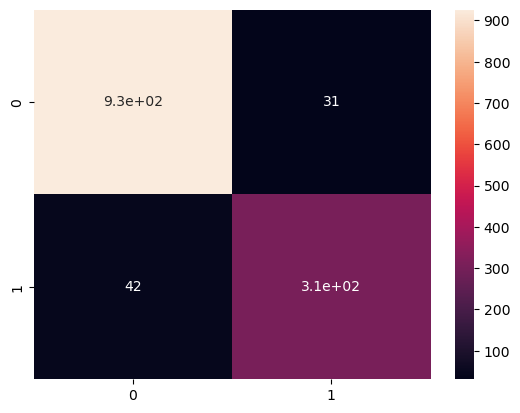

In [224]:
sns.heatmap(cm,annot=True)